### Step1: データの準備

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step2: ひとまず可視化

Text(0,0.5,'Number of houses')

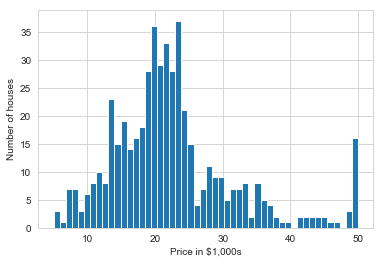

In [6]:
plt.hist(boston.target,bins=50)
plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

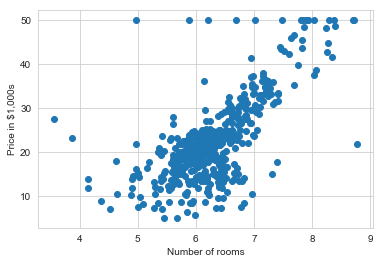

In [8]:
# 5番目のRMの列が部屋の数
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# 価格列を作成する
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/ts-hirota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


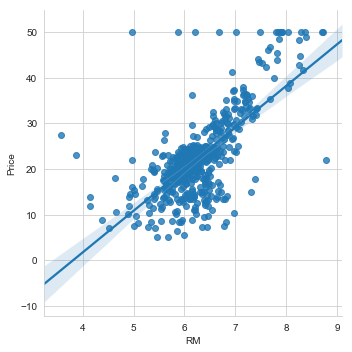

In [12]:
# lmplotで回帰直線を引く
sns.lmplot('RM','Price',data=boston_df)

### Step4: Numpyを使った単回帰

In [19]:
# 部屋数
X = boston_df.RM
print(X.shape)
X = np.vstack(boston_df.RM)
print(X.shape)

(506,)
(506, 1)


In [20]:
Y = boston_df.Price
print(Y.shape)

(506,)


In [21]:
# Xを[X 1]の形にする
X = np.array([[value, 1] for value in X],dtype=np.float64)

In [22]:
# 最小二乗法で求めた近似直線の傾きと切片の計算を実行
a, b = np.linalg.lstsq(X,Y)[0]

/Users/ts-hirota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


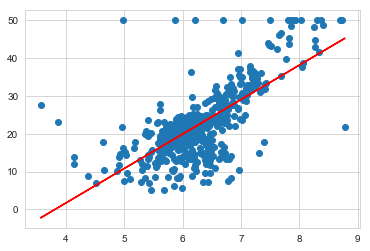

In [25]:
# 元のデータをプロットする
plt.plot(boston_df.RM,boston_df.Price,'o')

# 回帰直線を描く
x = boston_df.RM
plt.plot(x,a*x+b,'r')

### Step5: 誤差について

In [26]:
# 最小二乗法結果をうける
result = np.linalg.lstsq(X,Y)

/Users/ts-hirota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [28]:
# 2つ目の要素に、誤差の合計が入る
error_total = result[1]

# 誤差の平均値の平方根を計算する
rmse = np.sqrt(error_total/len(X))

print(f'平均二乗誤差の平方根は、{rmse[0]:0.2f}')

平均二乗誤差の平方根は、6.60


### Step6: scikit-leanを使った重回帰分析

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
lreg = LinearRegression()

In [34]:
# 説明変数
X_multi = boston_df.drop('Price',1)

# 目的変数
Y_target = boston_df.Price

In [35]:
# モデル作成
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print(f'切片は{lreg.intercept_:0.2f}')

切片は36.49


In [37]:
print(f'係数の数は{len(lreg.coef_)}個')

係数の数は13個


In [38]:
# 全ての要素を説明変数に用いてFeaturesというカラム名にする
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Step7: 学習(Training)と検証(Validation)

In [40]:
# 説明変数をX、目的変数をYとする
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [41]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


### Step8: 価格の予測

In [42]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [46]:
print(f'X_trainを使ったモデルの平均二乗誤差={np.mean((Y_train - pred_train)**2):0.2f}')
print(f'X_testを使ったモデルの平均二乗誤差={np.mean((Y_test - pred_test)**2):0.2f}')

X_trainを使ったモデルの平均二乗誤差=21.11
X_testを使ったモデルの平均二乗誤差=24.98


### Step9: 残差プロット

Text(0.5,1,'Residual Plots')

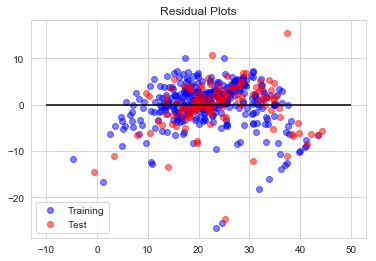

In [47]:
# 学習用データ
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)
# テスト用データ
test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)
# y=0の水平軸を描く
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')